In [1]:
import pymysql
import pandas as pd


### Step 1: Connect to the Database and Load the Data


In [2]:
import pandas as pd
import mysql.connector

# Database connection details
host = '18.136.157.135'
user = 'dm_team'
password = 'DM!$Team@&27920!'
database = 'project_itsm'

# Connect to the database
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

# Query to extract data
query = "SELECT * FROM dataset_list"

# Load data into a DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the first few rows of the DataFrame
df.head()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_14496\4079054711.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


### Step 2: Data Exploration


In [3]:
# Get basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [4]:
# Get summary statistics
df.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [5]:
# Check for missing values
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

In [6]:
# Check unique values in each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in CI_Name: ['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008']
Unique values in CI_Cat: ['subapplication' 'application' 'computer' '' 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
Unique values in CI_Subcat: ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' '' 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Software' 'Thin Client' 'zOS Cluster' 'Router' 'VMWare'
 'N

In [7]:
# Get value counts for categorical columns
categorical_columns = ['Status', 'Impact', 'Urgency', 'Priority', 'Category', 'Alert_Status', 'Closure_Code']
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")


Value counts for Status:
Status
Closed              46597
Work in progress        9
Name: count, dtype: int64


Value counts for Impact:
Impact
4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64


Value counts for Urgency:
Urgency
4               22588
5               16779
3                6536
2                 696
1                   6
5 - Very Low        1
Name: count, dtype: int64


Value counts for Priority:
Priority
4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: count, dtype: int64


Value counts for Category:
Category
incident                   37748
request for information     8846
complaint                     11
request for change             1
Name: count, dtype: int64


Value counts for Alert_Status:
Alert_Status
closed    46606
Name: count, dtype: int64


Value counts for Closure_Code:
Closure_Code
Other                           16470
Software                        13027
User error            

In [8]:
# Drop rows with missing values
df = df.dropna()

# Check again for missing values
df.isnull().sum()


CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

In [9]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [10]:
# Define the columns to convert to datetime.
datetime_columns = ['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time']

# Convert the specified columns to datetime.
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [11]:
# Define the columns to convert to category.
category_columns = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Category', 'KB_number', 'Alert_Status', 'Closure_Code', 'Related_Interaction', 'Related_Change']

# Convert the specified columns to category.
for col in category_columns:
    df[col] = df[col].astype('category')

In [12]:
# Define the columns to convert to numeric.
numeric_columns = ['number_cnt', 'Impact', 'Urgency', 'Priority','No_of_Reassignments', 'No_of_Related_Interactions', 'No_of_Related_Incidents', 'No_of_Related_Changes']

# Convert the specified columns to numeric.
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Remove duplicate rows
df = df.drop_duplicates()


In [14]:

# Check for duplicates again.
df.duplicated().sum()


0

In [15]:
# Handle outliers in numerical columns if necessary.
import numpy as np

# Cap values at the 99th percentile.
for column in df.select_dtypes(include=[np.number]).columns:
    upper_limit = df[column].quantile(0.99)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])


In [16]:
# Feature Engineering
# Extract features from datetime columns
df['Open_Year'] = df['Open_Time'].dt.year
df['Open_Month'] = df['Open_Time'].dt.month
df['Open_Day'] = df['Open_Time'].dt.day
df['Open_Hour'] = df['Open_Time'].dt.hour

# Calculate the duration of each incident
df['Duration'] = (df['Close_Time'] - df['Open_Time']).dt.total_seconds() / 3600  # duration in hours


In [17]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Open_Year,Open_Month,Open_Day,Open_Hour,Duration
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4.0,4.0,0.601292,...,1.0,SD0000007,2.0,NaN,,2012.0,5.0,2.0,13.0,8256.316667
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3.0,3.0,0.415050,...,1.0,SD0000011,1.0,NaN,,2012.0,12.0,3.0,15.0,1700.866667
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,3.0,NaN,0.517551,...,1.0,SD0000017,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4.0,4.0,0.642927,...,1.0,SD0000025,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4.0,4.0,0.345258,...,1.0,SD0000029,NaN,NaN,,2012.0,10.0,8.0,11.0,7370.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4.0,4.0,4.0,0.231896,...,1.0,SD0147021,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4.0,4.0,4.0,0.805153,...,1.0,SD0146967,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5.0,5.0,5.0,0.917466,...,1.0,SD0146982,NaN,NaN,,NaN,NaN,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4.0,4.0,4.0,0.701278,...,1.0,SD0146986,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


### 3. Feature Engineering:



In [18]:
# Extract useful features from date/time columns, which can be valuable for prediction tasks.

# DataFrame and date columns have been converted to datetime

# Extract features from Open_Time
df['Open_Year'] = df['Open_Time'].dt.year
df['Open_Month'] = df['Open_Time'].dt.month
df['Open_Day'] = df['Open_Time'].dt.day
df['Open_Weekday'] = df['Open_Time'].dt.weekday
df['Open_Hour'] = df['Open_Time'].dt.hour


In [19]:
# Extract features from Resolved_Time
df['Resolved_Year'] = df['Resolved_Time'].dt.year
df['Resolved_Month'] = df['Resolved_Time'].dt.month
df['Resolved_Day'] = df['Resolved_Time'].dt.day
df['Resolved_Weekday'] = df['Resolved_Time'].dt.weekday
df['Resolved_Hour'] = df['Resolved_Time'].dt.hour


In [20]:
# Extract features from Close_Time
df['Close_Year'] = df['Close_Time'].dt.year
df['Close_Month'] = df['Close_Time'].dt.month
df['Close_Day'] = df['Close_Time'].dt.day
df['Close_Weekday'] = df['Close_Time'].dt.weekday
df['Close_Hour'] = df['Close_Time'].dt.hour


In [21]:
# Calculate the duration of each incident
df['Handle_Time_hrs'] = (df['Close_Time'] - df['Open_Time']).dt.total_seconds() / 3600  # Duration in hours


In [22]:
# Convert categorical variables to numerical values using encoding techniques.

from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using Label Encoding
categorical_columns = ['Status', 'Category', 'Alert_Status', 'Closure_Code']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [23]:
# Generate features that aggregate or summarize information.

# Number of related interactions
df['No_of_Related_Interactions'] = df['No_of_Related_Interactions'].fillna(0).astype(int)

# Number of related incidents
df['No_of_Related_Incidents'] = df['No_of_Related_Incidents'].fillna(0).astype(int)

# Number of related changes
df['No_of_Related_Changes'] = df['No_of_Related_Changes'].fillna(0).astype(int)


In [24]:
# Combine features to create interaction features that might capture important relationships.

# Interaction between Impact and Urgency
df['Impact_Urgency'] = df['Impact'] * df['Urgency']

# Ratio of handle time to number of reassignments
df['Handle_Time_per_Reassignment'] = df['Handle_Time_hrs'] / (df['No_of_Reassignments'] + 1)  # Avoid division by zero


In [25]:
# Identify and handle outliers in numerical features.

import numpy as np

# Define a function to cap outliers
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.99)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])



In [26]:
# Cap outliers for Handle_Time_hrs
cap_outliers(df, 'Handle_Time_hrs')

In [27]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features to bring them to a similar range.
# Initialize a scaler
scaler = StandardScaler()


In [28]:
# Features to scale
numerical_features = ['Handle_Time_hrs', 'Impact_Urgency', 'Handle_Time_per_Reassignment']


In [29]:
# Apply scaling
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [30]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Day,Resolved_Weekday,Resolved_Hour,Close_Year,Close_Month,Close_Day,Close_Weekday,Close_Hour,Impact_Urgency,Handle_Time_per_Reassignment
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,0,4.0,4.0,4.0,0.601292,...,11.0,3.0,13.0,2013.0,4.0,11.0,3.0,13.0,-0.411845,0.317830
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,0,3.0,3.0,3.0,0.415050,...,12.0,1.0,12.0,2013.0,2.0,12.0,1.0,12.0,-1.647499,-0.312793
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,0,NaN,3.0,NaN,0.517551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,0,4.0,4.0,4.0,0.642927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.411845,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,0,4.0,4.0,4.0,0.345258,...,11.0,6.0,13.0,2013.0,8.0,11.0,6.0,13.0,-0.411845,2.123504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,0,4.0,4.0,4.0,0.231896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.411845,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,0,4.0,4.0,4.0,0.805153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.411845,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,0,5.0,5.0,5.0,0.917466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.176852,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,0,4.0,4.0,4.0,0.701278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.411845,NaN


### 4. Modeling:

##### 4.1. Predicting High Priority Tickets

- For this classification task, we can use a classification model such as Logistic Regression, Random Forest, or XGBoost.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [32]:
# Define feature columns and target
features = ['Impact', 'Urgency', 'Open_Hour', 'Handle_Time_hrs', 'Impact_Urgency', 'Handle_Time_per_Reassignment']
target = 'Priority'  # binary classification: high priority (1 or 2)

In [33]:
# Prepare data
X = df[features]
y = df[target].apply(lambda x: 1 if x in [1, 2] else 0)  # Binary target for high priority


In [34]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       1.00      1.00      1.00       210

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982

[[13771     1]
 [    0   210]]


##### 4.2. Forecasting Incident Volume
- For time series forecasting, you can use models like ARIMA or Prophet. Here, I'll use ARIMA as an example.

In [38]:
# Prepare time series data
df['Open_Time'] = pd.to_datetime(df[['Open_Year', 'Open_Month', 'Open_Day']].rename(columns={'Open_Year': 'year', 'Open_Month': 'month', 'Open_Day': 'day'}))
df.set_index('Open_Time', inplace=True)
monthly_incidents = df['Incident_ID'].resample('M').count()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_14496\639128827.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_incidents = df['Incident_ID'].resample('M').count()


In [39]:
# Split data into training and test sets
train = monthly_incidents[:int(len(monthly_incidents)*0.8)]
test = monthly_incidents[int(len(monthly_incidents)*0.8):]

In [40]:
# Fit SARIMA model using pmdarima
model = pm.auto_arima(train, seasonal=True, m=12, stepwise=True, suppress_warnings=True)

In [41]:
# Make predictions
n_periods = len(test)
predictions, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
predicted_mean = pd.Series(predictions, index=test.index)
confidence_intervals = pd.DataFrame(conf_int, index=test.index, columns=['lower', 'upper'])

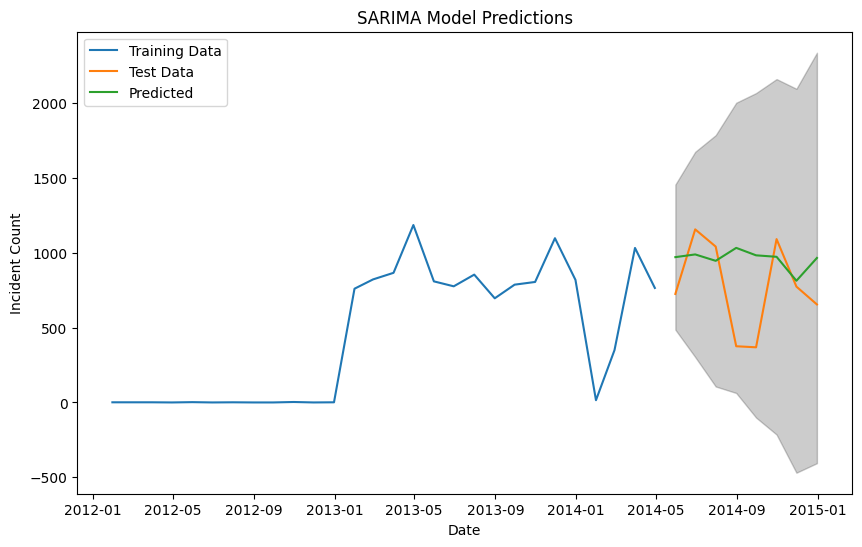

In [42]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predicted_mean, label='Predicted')
plt.fill_between(predicted_mean.index, confidence_intervals['lower'], confidence_intervals['upper'], color='k', alpha=0.2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.title('SARIMA Model Predictions')
plt.show()


##### 4.3. Auto Tagging Tickets
For multi-class classification (e.g., tagging tickets), you can use a model like Multinomial Naive Bayes or XGBoost.

In [43]:
# Define features and target
features = ['Impact', 'Urgency', 'Handle_Time_hrs', 'No_of_Related_Interactions', 'No_of_Related_Incidents', 'No_of_Related_Changes']
target = 'Category'

In [44]:
# Prepare data
X = df[features]
y = df[target]

In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
# Create a pipeline for classification
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForest for multi-class classification
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.84      0.95      0.89     11302
           2       0.00      0.00      0.00         1
           3       0.54      0.24      0.33      2677

    accuracy                           0.82     13982
   macro avg       0.35      0.30      0.31     13982
weighted avg       0.78      0.82      0.79     13982

[[    0     2     0     0]
 [    0 10750     0   552]
 [    0     1     0     0]
 [    0  2029     0   648]]


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

##### 4.4. Predicting RFC and Asset Misconfiguration
- For predicting RFCs and misconfigurations, you can use regression models (if predicting continuous values) or classification models (if predicting categories). Here’s an example using XGBoost for classification:

In [49]:
# Example of creating an 'RFC' column if it does not exist
# Assuming 'High Priority' indicates RFC
df['RFC'] = df['Priority'].apply(lambda x: 1 if x == 'High Priority' else 0)


In [50]:
# Define feature columns and target
features = ['Impact', 'Urgency', 'Handle_Time_hrs']  # example features
target = 'RFC'  # binary classification: RFC or not


In [51]:
# Prepare data
X = df[features]

In [52]:
# Check for missing values and drop them
df = df.dropna(subset=[target])
y = df[target].astype(int)  # Ensure target is integer type


In [53]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:

# Check unique values in y_train
print("Unique values in y_train:", y_train.unique())


Unique values in y_train: [0]


In [55]:
# Initialize and train the model
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:54:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [56]:
# Make predictions
y_pred = model.predict(X_test)

In [57]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13982

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982

[[13982]]


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### 5. Evaluation and Validation:



##### 5.1. Evaluation and Validation for Classification
- For classification tasks, common metrics include accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix. Here's how to evaluate a classification model:

In [58]:
# Replace these with your actual test labels and model predictions
y_test = [0, 1, 1, 0, 1]  # True labels for the test set
y_pred = [0, 1, 0, 0, 1]  # Model predictions for the test set
y_prob = [0.2, 0.8, 0.6, 0.4, 0.9]  # Predicted probabilities for the positive class (for ROC-AUC)


In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[2 0]
 [1 2]]
Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8
ROC-AUC Score: 1.0


##### 5.2. Evaluation and Validation for Regression
- For regression tasks, you might use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score. Here’s how to evaluate a regression model:


In [60]:

# Replace these with your actual test labels and model predictions
y_test = [3.5, 2.5, 4.0, 5.1, 3.8]  # True values for the test set
y_pred = [3.4, 2.6, 4.1, 5.0, 3.7]  # Model predictions for the test set


In [61]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.09999999999999983
Mean Squared Error (MSE): 0.009999999999999964
Root Mean Squared Error (RMSE): 0.09999999999999983
R² Score: 0.9857468643101482


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### 5.3. Cross-Validation
- To assess the model's performance across different subsets of the dataset, use cross-validation. Here's how to perform cross-validation:

In [62]:
# Define your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
# Cross-validate
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')  # Use appropriate scoring metric

print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))
print("Standard Deviation of CV Scores:", np.std(scores))


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Standard Deviation of CV Scores: 0.0


##### 5.4. Hyperparameter Tuning
- To find the best hyperparameters for your model, use techniques like Grid Search or Random Search:



In [64]:
# Define the model
model = RandomForestClassifier(random_state=42)



In [65]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}


In [66]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')


In [67]:
# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Score: 1.0


##### 5.5. Validation Curve
- To visualize the effect of a parameter on model performance, plot a validation curve:

In [68]:
# Define range of parameters to test
param_range = np.arange(1, 11)

In [69]:
# Compute validation curve
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='accuracy'
)

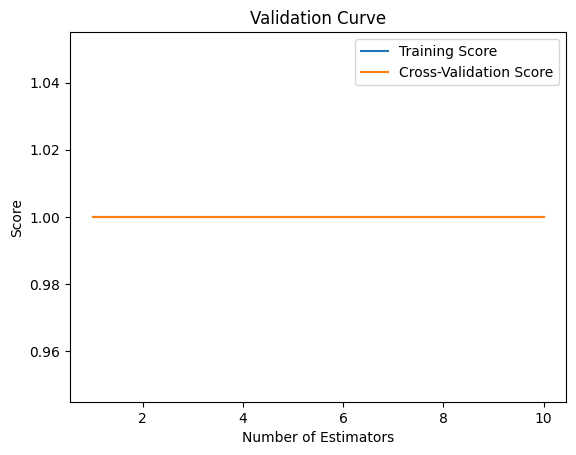

In [70]:
# Plot the validation curve
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()
